In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''') 

# <font color="#E56717">Comparative Effective Research</font>
## <font color="steelblue">Using SEER-Medicare to compare the efficacy and cost-effectiveness of different radiation treatment modalities for prostate cancer patients</font>

## IDA, 21 April 2017

### David Dooling

In [2]:
from IPython.display import IFrame

# <font color="#E56717">The Problem:</font>

* <span style="font-size:1.3em;">Two main classes of different types of external radiation beam therapy: $\gamma$ (photons) or other actual particles (protons in this case, but also research underway using carbon ions)</span>
* <span style="font-size:1.3em;">A $\gamma$-beam relatively inexpensive to generate, but less **controllable**. State of the art is $\bf{I}$ntensity $\bf{M}$odulated $\bf{R}$adiation $\bf{T}$herapy, but still causes collateral damage</span>
* <span style="font-size:1.3em;">$\bf{P}$roton $\bf{B}$eam $\bf{T}$herapy: More expensive to generate the particle beam, but causes much less collateral damage, based on plain physics and engineering principles</span>

###  <font color="red">Insurance companies pushing back; denying claims for PBT. Complicated appeal processes. Lack of clinical "evidence" given as justification. No RCT supporting the assumed benefits of PBT</font>

# <font color="#E56717">Results of the sponsored Study:</font>

<span style="font-size:1.7em;">Using a novel patient matching technique (using KDtrees) to distill the signal from the noise in observational claims data, the results show:

* <span style="font-size:1.7em;">Statistically significant better survival prognosis for PBT patients compared to IMRT</span>
* <span style="font-size:1.7em;">PBT lower complication rate than IMRT for rectal, bladder, endocrine system, and renal problems</span>
* <span style="font-size:1.7em;">And for approximately 30% of the matched groups, PBT patients have lower cumulative cost than their matched counterparts</span>

In [3]:
IFrame('https://www.bbc.com/news/uk-england-hampshire-29106294',width=800,height=400) # emotional appeals are moving, but will not sway insurance companies

## <font color="#E56717">Emotional appeals will not sway insurance companies. No RCT to point to; most practitioners will not knowingly give one arm of the study what they feel to be inferior treatment.</font>

# <font color="steelblue">Observational studies: Use the SEER-Medicare database</font>

<span style="font-size:1.5em;">The Surveillance, Epidemiology, and End Results (SEER) Program of the National Cancer Institute (NCI) is the most recognized authoritative source of information on cancer incidence and survival in the United States. SEER currently collects and publishes cancer incidence and survival data from population-based cancer registries covering approximately 28% of the US population</span>

# <font color="#E56717">Identify all the patients in the SEER-Medicare data who have received PBT</font>

<span style="font-size:1.7em;">Can be done via $\bf{H}$ealthcare $\bf{C}$ommon $\bf{P}$ocedure $\bf{C}$odes:</span>

* <span style="font-size:1.7em;">75520 - Proton trmt simple w/o comp</span>
* <span style="font-size:1.7em;">77522 - Proton trmt simple w/comp</span>
* <span style="font-size:1.7em;">77523 - Proton trmt intermediate</span>
* <span style="font-size:1.7em;">77525 - Proton treatment complex</span>

# <font color="#E56717">Likewise identify all patients who have received IMRT</font>

* <span style="font-size:1.7em;">77418 - Intensity modulated treatment delivery</span>

# <font color="steelblue">Then we need to perform patient "matching" in order to make the claim that any observed differences (survival, complication rate, total cost) are due to the different treatment regimens, and not to other factors or attributes of the patients that may differ between the PBT group and the IMRT group</font>

<span style="font-size:1.7em;">A simple example to illustrate the need for matching, and how it increases your ability to draw conclusions from data:</span>

<span style="font-size:1.7em;">Imagine a rental car agency that suspects that gasoline B get better miles per gallon than does gasoline A. The effect is $\bf{real}$, in the sense that if they use gasoline A for all cars one month at one location, and also use gasoline B at the sister location, gasoline B performs better</span>

<span style="font-size:1.7em;">But if you apply a standard unpaired t-test to see if this effect may be due to chance, you cannot rule out that it is infact due to chance:</span>

In [4]:
import pandas as pd
import qgrid
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder
qgrid.set_defaults(remote_js=True, show_toolbar=True,
                  grid_options = {'enableColumnReorder': True,
                                 'defaultColumnWidth': 250})

gas_a_list =[27.01, 20, 23.41, 25.22, 30.11,
             25.55, 22.23, 19.78, 33.45, 25.22]

gas_b_list = [26.95, 20.44, 25.05, 26.32, 29.56,
             26.60, 22.93, 20.23, 33.95, 26.01]

dfgas = pd.DataFrame({'gas_a_mpg': gas_a_list,
                         'gas_b_mpg': gas_b_list})

In [5]:
dfgas

,gas_a_mpg,gas_b_mpg
0,27.01,26.95
1,20.00,20.44
2,23.41,25.05
3,25.22,26.32
4,30.11,29.56
5,25.55,26.60
6,22.23,22.93
7,19.78,20.23
8,33.45,33.95
9,25.22,26.01


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

import seaborn as sns
import sklearn as sk
import statsmodels as sm
from datetime import datetime

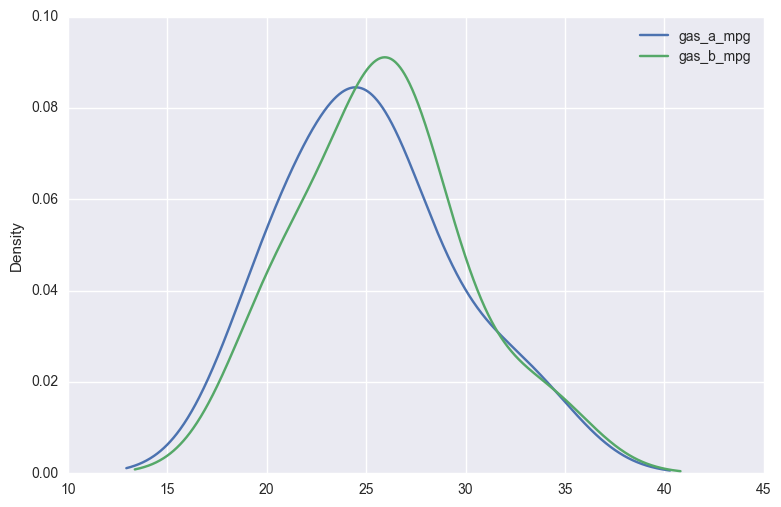

In [7]:
dfgas.plot.kde();

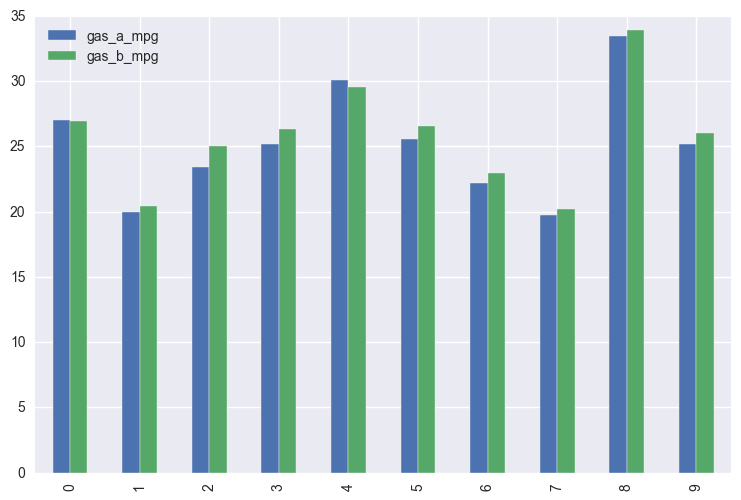

In [8]:
dfgas[['gas_a_mpg','gas_b_mpg']].plot(kind='bar');

<span style="font-size:1.7em;">If you perform a standard, non-paired hypothesis test to see if the means differ, you conclude that it is just random luck and that there is no effect. The problem is that even though gas b is slightly better than gas a, the large standard deviations induce a large standard error - the mileages vary widely from one car to the next. Analagous to the situation with patients in the SEER-Medicare data.</span>

<span style="font-size:1.5em;">If you assign gas a and gas b to the $\bf{same}$ car on different days, and then record the milage, you can rule out the null hypothesis even with this small dataset. This happens because the standard deviations of the differences among the pairs are now small. This difference column, by comparing gas performance within a single car, eliminates the variability between cars.</span>

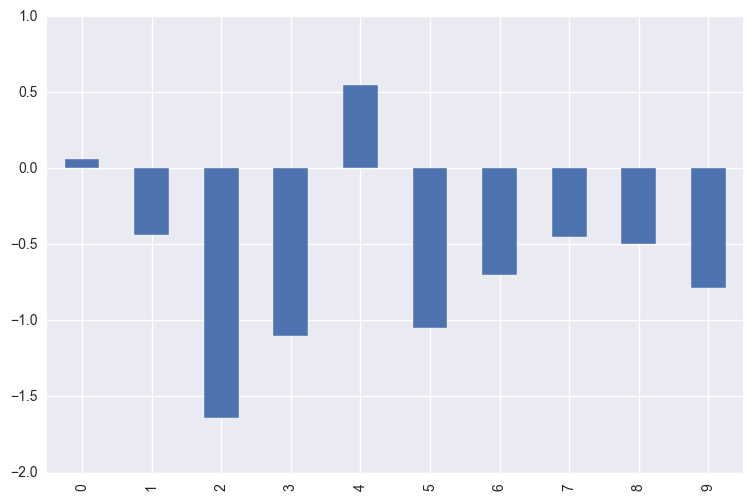

In [9]:
dfgas['diff'] = dfgas.gas_a_mpg - dfgas.gas_b_mpg
dfgas['diff'].plot(kind='bar');

In [10]:
from scipy.stats import ranksums, ttest_rel

ttest_rel(dfgas.gas_a_mpg.as_matrix(),
               dfgas.gas_b_mpg.as_matrix())

Ttest_relResult(statistic=-3.1196615512720802, pvalue=0.012325349247526556)

# <font color="#E56717">Features to use in the matching:</font>

* <span style="font-size:1.3em;">Marital Status</span>
* <span style="font-size:1.3em;">Race</span>
* <span style="font-size:1.3em;">Grade (a clinical attribute of the cancer)</span>
* <span style="font-size:1.3em;">Chemo (a binary variable indicating whether or not chemo was administered) (from claims)</span>
* <span style="font-size:1.3em;">Histology (another clinical attribute with many possible values)</span>
* <span style="font-size:1.3em;">How many "Fractions" were administered (a measure of how many RT treatments given; from claims)</span>
* <span style="font-size:1.3em;">Hispanic origin demographics</span>
* <span style="font-size:1.3em;">Stage of disease</span>
* <span style="font-size:1.3em;">Birth year</span>
* <span style="font-size:1.3em;">Year of Diagnosis</span>
* <span style="font-size:1.3em;">latitutde and longitude, derived from patient STATE and COUNTY FIPS codes</span>
* <span style="font-size:1.3em;">Charlson Comorbidty index (from claims)</span>
* <span style="font-size:1.3em;">Whether or not hormone therapy was part of treatment (from claims)</span>

# <font color="steelblue">Why not include the SEER tumor size variable?</font>

## It is missing for almost half the prostate patients, and for the cases where it is recorded as a number and not a categorical text value, it suffers from the End Digit Preference phenomena:

In [11]:
preDouble = "\\\\iobsdc01\\SharedDocs\\SEER_MEDICARE\\SEER_MEDICARE_STAGING"
new = os.chdir(preDouble)
#print(preDouble)

In [12]:
df = pd.read_pickle('dfpedsfFirsts.pickle')


In [13]:
cstum1mask =  (df['cstum1'] != "Unknown; size not stated; not stated in patient record") & \
(df['cstum1'] != "Microscopic focus or foci only; no size of focus is given") & \
(df['cstum1'] != "989 millimeters or larger") & \
(df['cstum1'] != "Not applicable") & \
(df['cstum1'] != "Unknown age") & \
(df['cstum1'] != "Described as less than 1 cm") & \
(df['cstum1'] != "Described as less than 2 cm") & \
(df['cstum1'] != "Described as less than 3 cm") & \
(df['cstum1'] != 'Indicates no mass or no tumor found; for example, when a tumor of a stated primary site is not found, but the tumor has metastasized') & \
(df['cstum1'] != "Described as less than 4 cm") & \
(df['cstum1'] != "Described as less than 5 cm") & \
(df['cstum1'] != "Not applicable") & \
(df['cstum1'] != 'Not applicable') & \
(df['cstum1'] != 996) & \
(df['cstum1'] != 997) & \
(df['cstum1'] != 998) & \
(df['srvm1'] != 9999)

# End-digit preference

<span style="font-size:1.5em;">"In converting analog to digital data, observers may record som eterminal digits with an unusual frequency, for example rounding off may be to the nearest whole number, even number, multiple of 5 or 10, or when time units like a week arre involved, 7, 14, etc."</span>

* <span style="font-size:1.3em;">Encyclopedia of Epidemiologic Methods, by Mitchell H. Gail, Jacques Benichou</span>



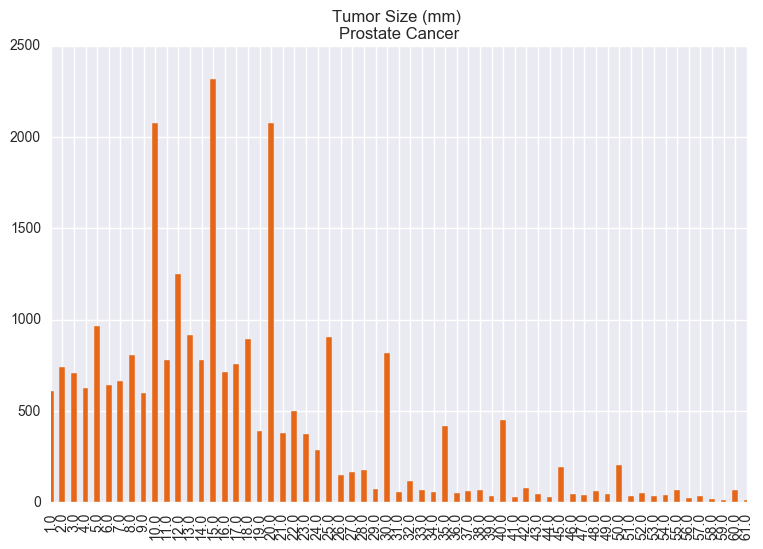

In [14]:
df[cstum1mask & df.siterwho1.str.contains("prostate",case=False,na=False)].cstum1.value_counts().sort_index().plot(kind='bar',
            title='Tumor Size (mm) \nProstate Cancer',color='#E56717');
plt.xlim(0,60);

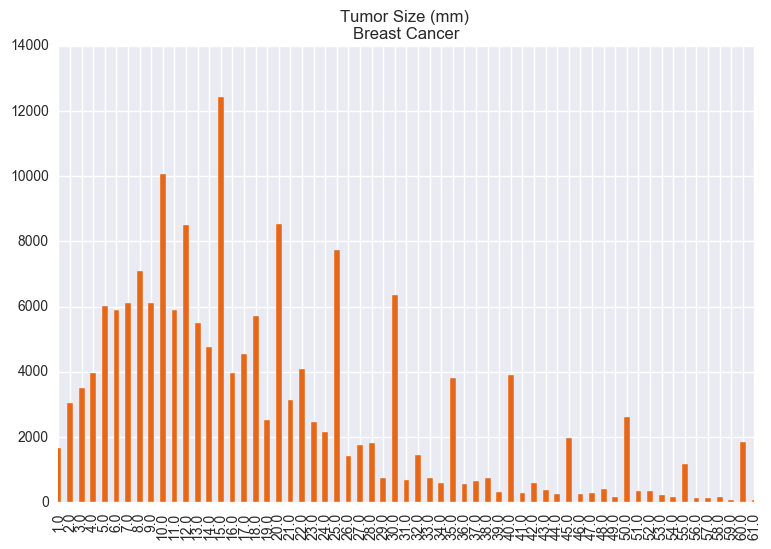

In [15]:
df[cstum1mask & df.siterwho1.str.contains("breast",case=False,na=False)].cstum1.value_counts().sort_index().plot(kind='bar',
            title='Tumor Size (mm) \nBreast Cancer',color='#E56717');
plt.xlim(0,60);

# <font color="#E56717">851 PBT patients and 28102 IMRT patients prior to matching</font>


<span style="font-size:1.7em;">Look at the Kaplan-Meier survival curve before matching</span>

<span style="font-size:1.7em;">$\bf{survival}$ $\bf{curve}, S(t)$ is a function that maps from a duration, $t$, to the probablity of surviving longer than $t$. If you know the distribution of durations, then the survival curve is just 1 minus the cumulative distribution function: $S(t) = 1 - CDF(t)$</span>



<span style="font-size:1.7em;">But we do not know the distribution of lifetimes directly: right-censored data. If some patients have died, we know their survival times. For patients that are still living at the end of the observation period, we don't know the survival time, but we do have some information: a lower bound. Kaplan-Meier curves take advantage of this extra information to form an estimate of a survival curve relevant to a group.</span>

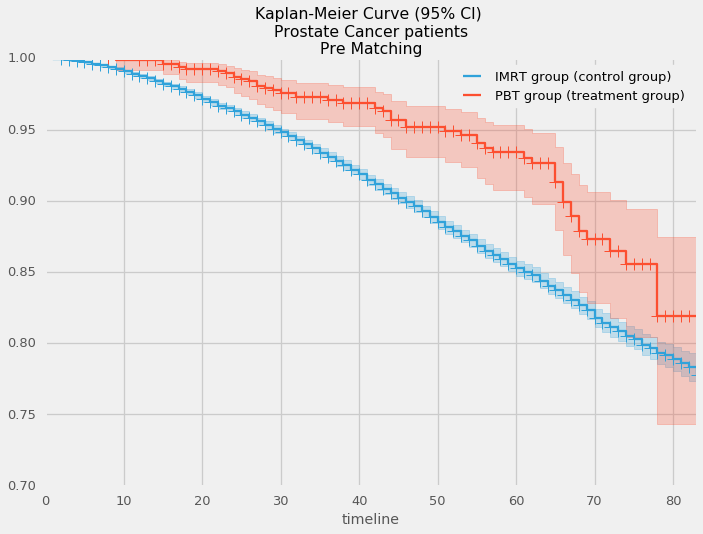

In [22]:
from IPython.display import Image
Image(filename="survival_pre_matching.png",embed=True)

In [23]:
# Now show the characteristics of the patients; League == 1 means PBT
df = pd.read_csv('everything_pre_matching.csv')

pd.set_option("display.max_columns", 999)

pd.set_option("display.max_rows", 999)

import qgrid
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder
qgrid.set_defaults(remote_js=True, show_toolbar=True,
                  grid_options = {'enableColumnReorder': True,
                                 'defaultColumnWidth': 250})

# <font color="#E56717">Patients before matching:</font>

In [25]:
df

,patient_id,m_sex,marst1,srace,nhiade,grade1,site1,chemo,lat1,histrec1,dajccstg1,modx1,birthyr,agedx1,countystate_1,yrdx1,elevation_1,lng_1,lat_1,League,total_score,hormone,fraction,riskband,srvm1,stat_rec
0,8826075413,Male,Married (including common law),Unknown,Non-Spanish-Hispanic-Latino,Grade II; grade ii; grade 2; moderately differ...,Prostate gland,0,Not a paired site,"8010-8049: epithelial neplasms, NOS",Stage Unknown,Jun,1933,76,"Alameda County, CA",2010,713.249840,-121.719546,37.601689,0,2.0,0.0,45.0,stage unknown,30,Alive
1,4461119095,Male,Married (including common law),White,Non-Spanish-Hispanic-Latino,Grade II; grade ii; grade 2; moderately differ...,Prostate gland,0,Not a paired site,8140-8398: adenomas and adenocarcinomas,Stage II,Jan,1944,67,"Monmouth County, NJ",2011,129.992246,-74.123996,40.258946,0,0.0,0.0,44.0,intermediate risk,22,Alive
2,4440137063,Male,Divorced,Black,Non-Spanish-Hispanic-Latino,"Grade III; grade iii, grade 3; poorly differen...",Prostate gland,0,Not a paired site,8140-8398: adenomas and adenocarcinomas,Stage II,Jan,1939,67,"Essex County, NJ",2007,375.058970,-74.264883,40.794747,0,1.0,0.0,41.0,intermediate risk,71,Alive
3,8825040472,Male,Married (including common law),White,Non-Spanish-Hispanic-Latino,"Grade III; grade iii, grade 3; poorly differen...",Prostate gland,1,Not a paired site,8140-8398: adenomas and adenocarcinomas,Stage III,Jul,1943,67,"Los Angeles County, CA",2010,284.596325,-118.243660,34.052227,0,0.0,0.0,40.0,high risk,29,Alive
4,4492165053,Male,Married (including common law),White,Non-Spanish-Hispanic-Latino,Grade II; grade ii; grade 2; moderately differ...,Prostate gland,0,Not a paired site,8140-8398: adenomas and adenocarcinomas,Stage II,May,1933,75,"Ocean County, NJ",2008,58.865580,-74.311821,39.965255,0,0.0,0.0,37.0,intermediate risk,55,Alive
5,4472145084,Male,Married (including common law),White,Non-Spanish-Hispanic-Latino,"Grade III; grade iii, grade 3; poorly differen...",Prostate gland,1,Not a paired site,8140-8398: adenomas and adenocarcinomas,Stage II,Jul,1933,76,"Middlesex County, NJ",2009,17.595443,-74.358747,40.411136,0,0.0,0.0,42.0,intermediate risk,41,Alive
6,2679000032,Male,Married (including common law),White,Non-Spanish-Hispanic-Latino,"Grade III; grade iii, grade 3; poorly differen...",Prostate gland,0,Not a paired site,8140-8398: adenomas and adenocarcinomas,Stage II,Mar,1934,74,"Salt Lake County, UT",2009,4452.246460,-111.952249,40.644188,0,0.0,0.0,37.0,intermediate risk,45,Alive
7,8826004365,Male,Married (including common law),White,"Spanish/Hispanic/Latino, NOS","Grade III; grade iii, grade 3; poorly differen...",Prostate gland,1,Not a paired site,8140-8398: adenomas and adenocarcinomas,Stage II,Apr,1946,72,"Monterey County, CA",2009,1892.575903,-121.354163,36.313620,0,1.0,0.0,42.0,intermediate risk,7,Alive
8,4350275020,Male,Married (including common law),White,Non-Spanish-Hispanic-Latino,"cell type not determined, not stated or not ap...",Prostate gland,1,Not a paired site,8140-8398: adenomas and adenocarcinomas,Stage II,Aug,1934,75,"Rapides Parish, LA",2010,161.308008,-92.539603,31.146110,0,2.0,0.0,18.0,intermediate risk,28,Alive
9,4406115055,Male,Single (never married),White,Non-Spanish-Hispanic-Latino,"Grade III; grade iii, grade 3; poorly differen...",Prostate gland,1,Not a paired site,8140-8398: adenomas and adenocarcinomas,Stage II,Nov,1939,70,"Camden County, NJ",2009,49.243278,-75.014382,39.859244,0,3.0,0.0,41.0,intermediate risk,37,Alive


# <font color="#E56717">Perform patient matching using a KDtree</font>

<span style="font-size:1.7em;">Want to find patients that are as close to each as possible in this high dimensional feature space. Traditionally done using something called propensity score matching (logitistic regression; linear). We can do much better thanks to modern computing capablity and this KDtree data structure.<span>

<span style="font-size:1.2em;">A K-d tree, or k-dimensional tree, is a data structure that is very useful for finding nearest neighbors in a k-dimensional space. The essential idea behind k-d trees is that any point (along with the problem bounds) defines a k-1 dimensional hyperplane that partitions the remaining space into two sections. For example, in 1D a point p on a line l will split the line into the space above p and the space below p. In two dimensions, a line will split a plane. In three dimensions, a plane will split a cube, and so on. The points in a k-d tree can then be placed into a structure similar to a binary search tree.</span> 

# <font color="#E56717">Here is a video explaining the construction of a KDTree</font>

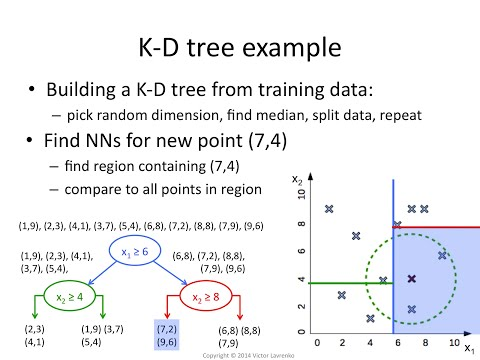

In [42]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y4ZgLlDfKDg')